In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as py
from scipy.io import loadmat

df=pd.read_csv('Mall_Customers.csv',header=None)
X = df.iloc[:, [3,4]].values


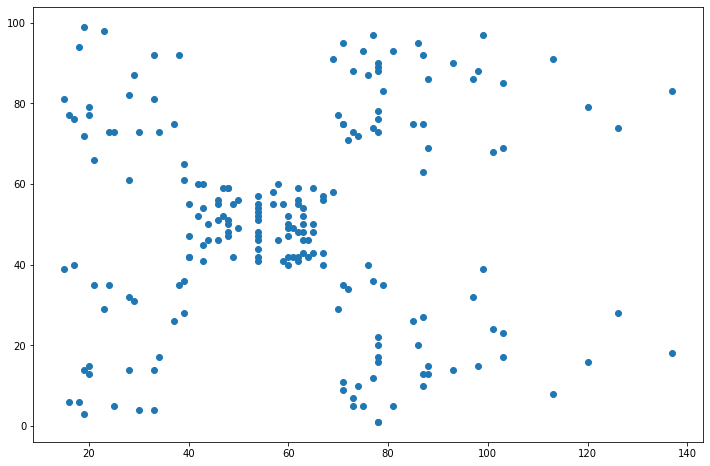

In [2]:
fig,ax=py.subplots(figsize=(12,8))
ax.scatter(X[:,0],X[:,1])

In [3]:
#By above picture we can conclude that there are five clusters
#we can check by elbow method which gave same result i.e,
k=5
Centroids = np.zeros((k,X.shape[1]))#k=5 means we should have 5 centroids all are initialised with zeros 

In [4]:
#Random initalisation of Centroids to find the 5 clusters
def RandomCentroids(X):
    for i in range(k):
        Centroids[i] = X[np.random.randint(0,X.shape[0]+1),:]
        
    return Centroids

In [5]:
#Finding Closest Centroid for each example and assigning nearest centroid to that example
def Update1(Centroids,X):
    indices = np.zeros((X.shape[0],1)) #Storing the nearest centorid for each example 
    
    for i in range(X.shape[0]):
        values= np.zeros((k,1))
        for j in range(k):
            distance = np.sum(np.power((X[i,:] - Centroids[j,:]),2))
            values[j] = distance    #Storing all the centroid distances of each example in values 
                                    # and finding index of minimum values and assigning to indices
                                   
        indices[i] = np.argmin(values) #np.argmin gives the index of minimum value 
    
    return indices

In [6]:
#Finding mean of each centroid 
def Update2(indices,X):
    Centroids = np.zeros((k,X.shape[1]))
    Noofexamples = np.zeros((k,1))
    
    for i in range(X.shape[0]):
        ind= int(indices[i])
        
        Centroids[ind,:]= Centroids[ind,:]+X[i,:] #Adding all training examples to find mean
        Noofexamples[ind]=Noofexamples[ind]+1  #Counting no of training examples for each centroid
    
    return ((Centroids)/(Noofexamples))

In [ ]:
#plotting Kmeans for every iteration until it doesn't change the positions of centroids for two consecutive iterations
def kmeans(Centroids,X,indices):
   
    for i in range(10):
        print("Iteration number {}".format(i+1))
        cluster1=(indices==0).reshape(X.shape[0],1)
        cluster2=(indices==1).reshape(X.shape[0],1)
        cluster3=(indices==2).reshape(X.shape[0],1)
        cluster4=(indices==3).reshape(X.shape[0],1)
        cluster5=(indices==4).reshape(X.shape[0],1)
        py.scatter(X[cluster1[:,0], 0],X[cluster1[:,0], 1],s=10,c='red',label ='Cluster1')
        py.scatter(X[cluster2[:,0], 0],X[cluster2[:,0], 1],s=10,c='blue',label ='Cluster2')
        py.scatter(X[cluster3[:,0], 0],X[cluster3[:,0], 1],s=10,c='green',label ='Cluster3')
        py.scatter(X[cluster4[:,0], 0],X[cluster4[:,0], 1],s=10,c='yellow',label ='Cluster4')
        py.scatter(X[cluster5[:,0], 0],X[cluster5[:,0], 1],s=10,c='orange',label ='Cluster5')
        py.scatter(Centroids[:, 0],Centroids[:, 1],s=200,marker="x",c='black',label='Centroids')
        py.title('Clusters of Customers')
        py.xlabel('Annual Income')
        py.ylabel('Spending Score')
        py.show()
        Centroids = Update2(indices,X)
        indices= Update1(Centroids,X)
    

Iteration number 1


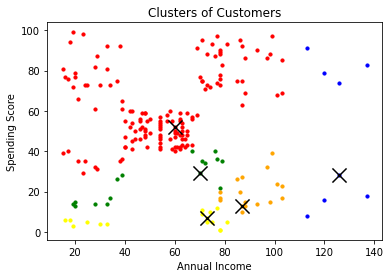

Iteration number 2


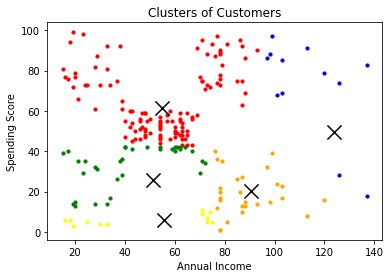

Iteration number 3


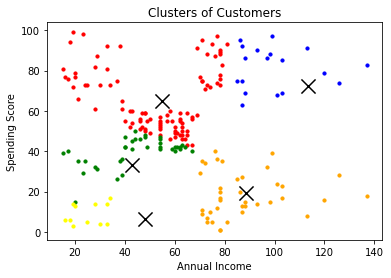

Iteration number 4


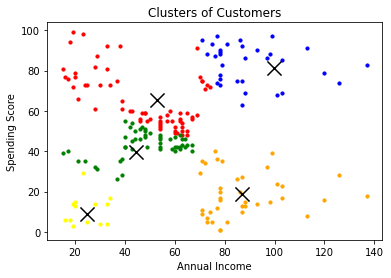

Iteration number 5


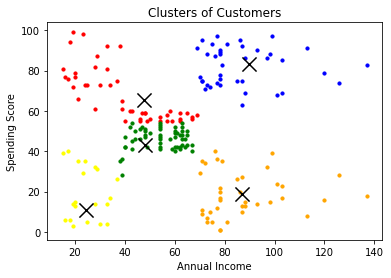

Iteration number 6


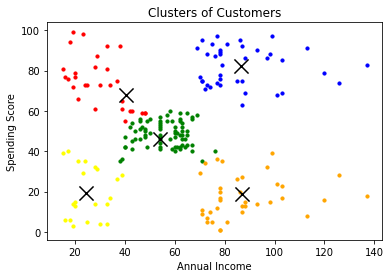

Iteration number 7


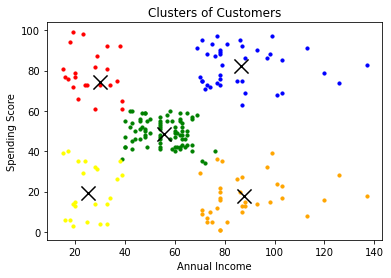

Iteration number 8


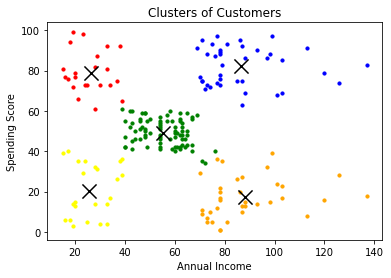

Iteration number 9


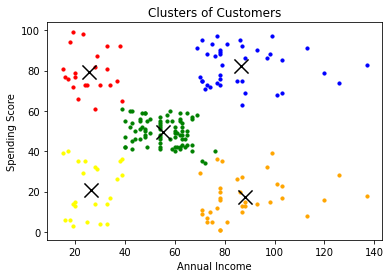

Iteration number 10


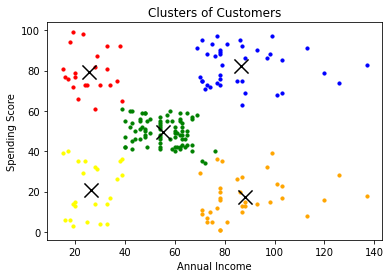

In [12]:
centroids = RandomCentroids(X)#First step initalising random centroids
indices = Update1(Centroids,X)#Second step Finding nearest centroid
kmeans(centroids,X,indices)#Third step plotting KMeans